## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING & INSPECTING DATA

1- bookID count shows 11127 rows (describe function) but highest bookID is 45641 (= it is an ID number, not a count)

2- removed unwanted commas separating several authors in Author column. As only 4 books were concerned it was done manually.

3- noticed special characters (jpn, chn, ar) in the authors names : no matter as this column author, although relevant, shall be removed due to difficulties in selecting the "right" author to work on for rating influence

4- isbn column: 

    - should be 10-digit long as "isbn10" standard number (before 2007)
    
    - a large number of rows have 7, 8, 9 digits or even 10 with an X at the end: should be dropped as it does not bring much help for our purpose 

5- isbn13 column (REFERENCE number since 2007):

    - should be 13-digit long as "isbn13" standard number

    - 10, 11 digit number --> should be dropped as it does not bring much help for our purpose 

6- "language code": english in 4 or 5 different versions (eg: en-GB, en-US, etc.): MAY NEED GROUPING BOOKS IN ENGLISH OR CREATE CATEGORIES TO IMPROVE PREDICTION (LIKE ENGLISH VS OTHER LANGUAGES)

7- "num_pages": books from 0 up to 6576 pages --> NEED FILTERING (as potential non-relevant outliers) BY DEFINING A "MIN/MAX NUM_PAGES" OR CREATE CATEGORIES TO IMPROVE PREDICTION

8- "Ratings count": from 0 to ~4.6M // MAY NEED TO FILTER OUT AT LEAST COUNTS 0, OR TAKE INTO ACCOUNT A "MIN RATING COUNT" OR CREATE CATEGORIES TO IMPROVE PREDICTION

9- "text_reviews count": from 0 to 94265 // SAME: MAY NEED TO FILTER OUT AT LEAST COUNTS 0, OR TAKE INTO ACCOUNT A "MIN REVIEWS COUNT" OR CREATE CATEGORIES TO IMPROVE PREDICTION

10- publication_date: US format / and 2 invalid dates (nov31 and jun31 do not exist, hence not recognized by excel as "actual dates") // SUCH DATE FOR PREDICTION DOES NOT SEEM USEFUL HERE 

11- publisher: "18-Oct" for 2 entries seems odd: actually a publisher called "10/18" (ref: https://www.goodreads.com/shelf/show/editeurs-10-18)


### importing data

In [2]:
df = pd.read_csv(r"C:\Users\33695\Documents\ML with Python\Project-20230605\Project 1\dataset\books_jul6.csv", delimiter=",", index_col="bookID")

In [3]:
df.head(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780440000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780440000000,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780440000000,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780440000000,eng,2690,41428,164,9/13/2004,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9780980000000,en-US,152,19,1,4/26/2005,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9780440000000,eng,3342,28242,808,9/12/2005,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780520000000,eng,815,3628,254,11/1/2005,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780350000000,eng,815,249558,4080,4/30/2002,Del Rey Books


In [4]:
df.tail(10)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789720000000,por,160,207,16,8/15/2003,Editorial Presença
45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789720000000,por,147,396,37,4/8/2003,Editorial Presença
45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789720000000,por,176,161,14,9/1/2004,Editorial Presença
45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789720000000,por,160,215,11,10/11/2003,Editorial Presença
45630,Whores for Gloria,William T. Vollmann,3.69,140231579,9780140000000,en-US,160,932,111,2/1/1994,Penguin Books
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560000000,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780140000000,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780140000000,eng,415,820,95,8/1/1993,Penguin Books
45639,Poor People,William T. Vollmann,3.72,60878827,9780060000000,eng,434,769,139,2/27/2007,Ecco


In [5]:
# Title: showing a range of rows with jpn characters (all columns)
df.loc[13593:13611,:] # using bookID row number OR df[3776:3786] using row index number

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
13593,ヒカルの碁 18、番外編,Yumi Hotta/Yumi Hotta,4.11,4088732898,9784090000000,jpn,211,275,7,8/2/2002,集英社
13594,ヒカルの碁 23、あなたに呼びかけている,Yumi Hotta/Yumi Hotta,4.22,4088735048,9784090000000,jpn,198,61,5,9/4/2003,集英社
13595,ヒカルの碁 7、若獅子戦,Yumi Hotta/Yumi Hotta,4.26,4088728734,9784090000000,jpn,208,9,2,6/7/2000,集英社
13596,ヒカルの碁 15、さよなら,Yumi Hotta/Yumi Hotta,4.25,4088732154,9784090000000,jpn,211,289,8,12/24/2001,集英社
13598,ヒカルの碁 13、プロ第一戦,Yumi Hotta/Yumi Hotta,4.26,4088731441,9784090000000,jpn,195,11,2,8/8/2001,集英社
13600,ヒカルの碁 14、sai vs toya koyo,Yumi Hotta/Yumi Hotta,4.23,4088731697,9784090000000,jpn,189,331,6,10/9/2001,集英社
13602,ヒカルの碁 16、中国棋院,Yumi Hotta/Yumi Hotta,4.15,4088732324,9784090000000,jpn,191,282,7,3/4/2002,集英社
13603,ヒカルの碁 6、院生試験,Yumi Hotta/Takeshi Obata,4.22,4088728491,9784090000000,jpn,211,8,2,4/9/2000,集英社
13608,ヒカルの碁 9、本戦開始,Yumi Hotta/Yumi Hotta,4.27,4088730224,9784090000000,jpn,207,9,2,10/9/2000,集英社


In [6]:
# langage_code: list all rows containing "en"
s_lang = df.language_code
val_lang = ['en-CA','eng','en-GB','enm','en-US']
df[s_lang.isin(val_lang)]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780440000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780440000000,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780440000000,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780440000000,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...
45630,Whores for Gloria,William T. Vollmann,3.69,140231579,9780140000000,en-US,160,932,111,2/1/1994,Penguin Books
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560000000,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780140000000,eng,635,783,56,12/1/1988,Penguin Books


NOTE: this latter listing showed 10544 rows containing "en" in the language code column

## data analysis

In [7]:
# basic stats on numeric only data 
df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,3.960000,9.780590e+12,299.000000,7.450000e+02,46.000000
75%,4.135000,9.780870e+12,416.000000,4.993500e+03,237.500000
max,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


df.describe treats isbn13 as a number.
however, does not display bookID nor isbn

Also: a total count of 11127 books are listed (note that 10544 are of "en" language code)

### search for inconsistencies

In [8]:
# look for "NA" values (None or NaN)
df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
# # look for values that are not "NA" (NotNone and Not NaN)
df.notna().sum()

title                 11127
authors               11127
average_rating        11127
isbn                  11127
isbn13                11127
language_code         11127
num_pages             11127
ratings_count         11127
text_reviews_count    11127
publication_date      11127
publisher             11127
dtype: int64

In [ ]:
# isbn13 is not NA?
df["isbn13"].notna()

In [10]:
# create new dataframe df1 to work on
## try and convert to string all rows of "isbn13" (to remove them for the describe() function)
df1 = df

In [11]:
# df1["isbn"][1]
df1.loc[ 1, 'isbn']

'439785960'

In [12]:
type(df1.loc[ 1, 'isbn'])

str

In [13]:
type(df1["isbn13"][1])

numpy.int64

In [14]:
# df1["isbn13"][1] = str(df1["isbn13"][1])
# df1.loc[ 1, 'isbn13'] = str(df1.loc[ 1, 'isbn13'])
# df1.loc[ 1, 'isbn13']
#for i in range(11127):
#    df1.loc[ i, 'isbn13'] = str(df1.loc[ i, 'isbn13'])
df1['isbn13'] = df1['isbn13'].astype('string')

In [15]:
df1.loc[ 1, 'isbn13']

'9780440000000'

In [19]:
type(df1['isbn13'][1])

str

In [56]:
# bookID serves as the current row index
# however, 'bookID' is not regular (new row not incremented by 1) as it goes from '1' to '45641' but counts only 11127 rows in total
# example: if we try df1.loc[6,'isbn13'] we get an error as '6' does not refer to a bookID
# df1.loc[6,'isbn13']
# iloc allows to find row nb 6 :
df1.iloc[6]

title                 Harry Potter Collection (Harry Potter  #1-6)
authors                                               J.K. Rowling
average_rating                                                4.73
isbn                                                     439827604
isbn13                                               9780440000000
language_code                                                  eng
num_pages                                                     3342
ratings_count                                                28242
text_reviews_count                                             808
publication_date                                         9/12/2005
publisher                                               Scholastic
Name: 10, dtype: object

In [23]:
# s1 = df1["isbn13"]
df1.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000
mean,3.933631,336.376921,1.793641e+04,541.854498
std,0.352445,241.127305,1.124794e+05,2576.176608
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,46.000000
75%,4.135000,416.000000,4.993500e+03,237.500000
max,5.000000,6576.000000,4.597666e+06,94265.000000


In [28]:
# df.Pclass.value_counts() # distribution / frequency of the classes "Pclass"
# df.groupby(["Pclass","Sex"]).mean().Age # grouping people by class, gender and avg age
# average_ages = df.groupby(["Pclass","Sex"]).mean().Age.astype(int).to_dict() # creates dictionary with Ages put as integers
# average_ages.keys() # to see what are the keys in the dict (here: 6 keys)
# average_ages[(1,"female")] # test the dictionary to check on 1 example
''' func age guesser
def age_guesser(Pclass_sex):       # age_guesser(1, "female") = 34
    Pclass_sex = tuple(Pclass_sex)
    age = average_ages[Pclass_sex]
    return age
'''
#  df.groupby(["Pclass","Sex"]).mean().Age.astype(int).to_dict()

' func age guesser\ndef age_guesser(Pclass_sex):       # age_guesser(1, "female") = 34\n    Pclass_sex = tuple(Pclass_sex)\n    age = average_ages[Pclass_sex]\n    return age\n'

In [29]:
df.language_code.value_counts() # distribution / frequency of the classes "language_code"

eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

In [26]:
df1.head()
# df1.describe()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780440000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780440000000,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780440000000,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780440000000,eng,2690,41428,164,9/13/2004,Scholastic


1) TRY TO CONVERT ISBN13 DATA TO STRING - DONE
2) find outliers in other columns (rating, num_pages, text_reviews)
3) consider including other columns (convert to numeric? 0 or 1 value? other?)

In [ ]:
# get_dummies tranforms categorical data to numbers
# here we want to transform the "Sex" column from ['male', 'female'] to [0,1]
# Ex: df_processed.loc[:,["Sex"]] = pd.get_dummies(df.Sex,drop_first=True).values

In [ ]:
# this is a way to explicit the "Pclass" column by transforming it to 3 columns corresponding to each of its values
# this is known as encoding
# df_processed = pd.concat([df_processed,pd.get_dummies(df_processed.Pclass)],axis=1).drop(columns="Pclass")

<function matplotlib.pyplot.show(close=None, block=None)>

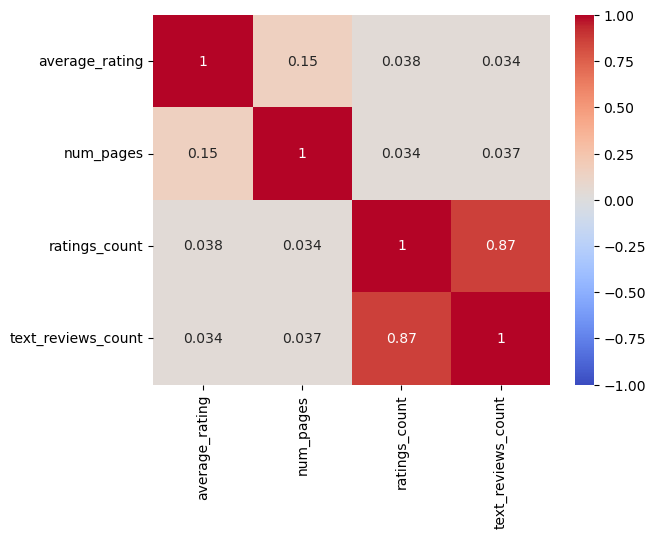

In [31]:
# PLOT CORRELATION ANALYSIS
df1_corr = df1[["average_rating", "num_pages","ratings_count", "text_reviews_count"]]
# corr = df_corr.corr()
corr1 = df1_corr.corr()
sns.heatmap(corr1, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show

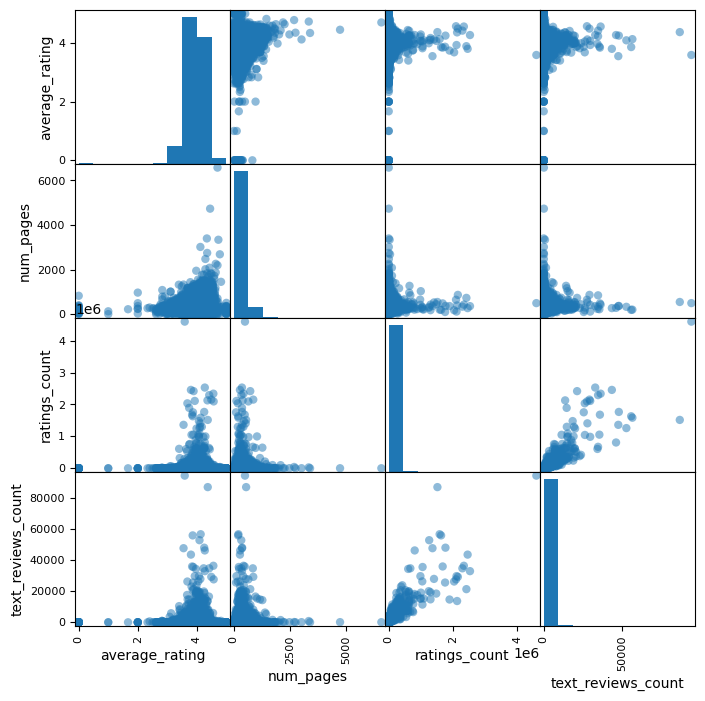

In [32]:
pd.plotting.scatter_matrix(df1_corr, figsize=(8,8), marker="o")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

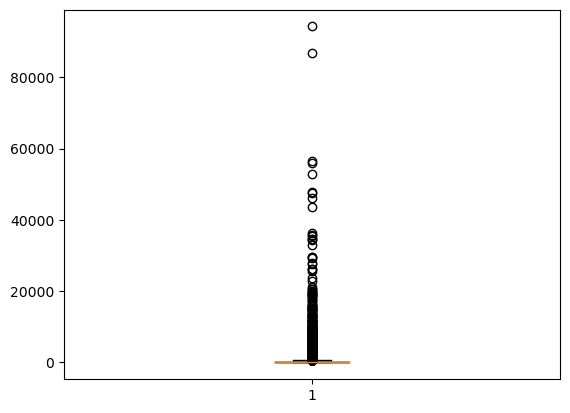

In [35]:
plt.boxplot(df1_corr["text_reviews_count"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

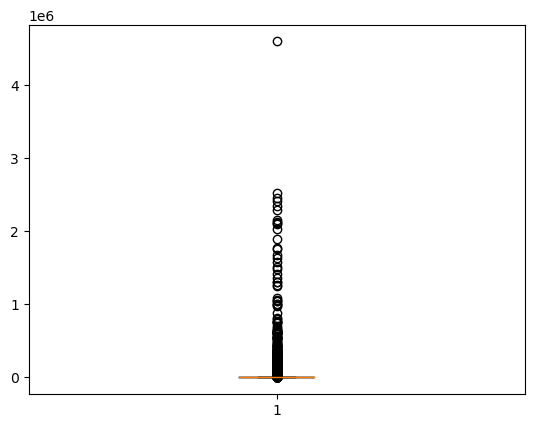

In [37]:
plt.boxplot(df1_corr["ratings_count"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

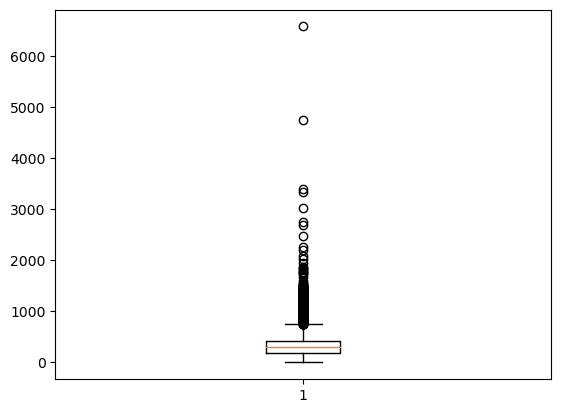

In [38]:
plt.boxplot(df1_corr["num_pages"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

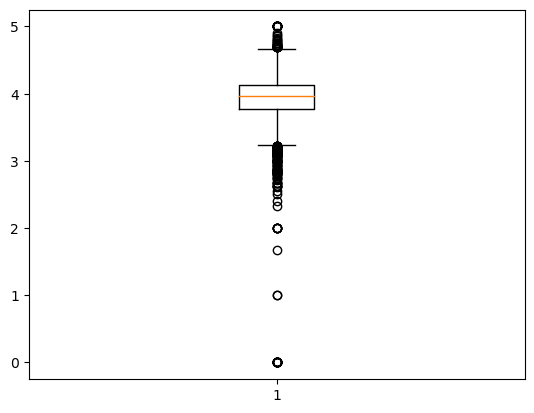

In [40]:
plt.boxplot(df1_corr["average_rating"])
plt.show

In [62]:
'''for i in range(11127): 
    if df1.iloc[i,7] == 0:
        df1.iloc[i,7].drop
df1.describe()
'''
df1 = df1.drop(index=df1.loc[df1.ratings_count == 0,:].index) # locating by rows where are null values, and then drop rows at those indexes

In [63]:
df1.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11046.000000,11046.000000,1.104600e+04,11046.00000
mean,3.943134,336.762810,1.806794e+04,545.82772
std,0.295213,240.971269,1.128806e+05,2585.18629
min,1.000000,0.000000,1.000000e+00,0.00000
25%,3.780000,194.000000,1.100000e+02,9.00000
50%,3.960000,300.000000,7.645000e+02,48.00000
75%,4.140000,416.000000,5.058750e+03,241.00000
max,5.000000,6576.000000,4.597666e+06,94265.00000


<function matplotlib.pyplot.show(close=None, block=None)>

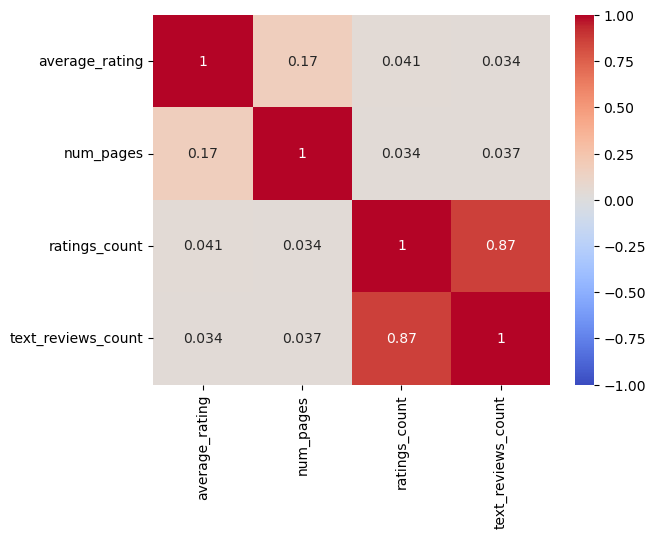

In [64]:
# PLOT CORRELATION ANALYSIS
df1_corr = df1[["average_rating", "num_pages","ratings_count", "text_reviews_count"]]
# corr = df_corr.corr()
corr1 = df1_corr.corr()
sns.heatmap(corr1, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show

In [70]:
df1_processed = df1_corr

In [73]:
df1.iloc[:,2]

bookID
1        4.57
2        4.49
4        4.42
5        4.56
8        4.78
         ... 
45631    4.06
45633    4.08
45634    3.96
45639    3.72
45641    3.91
Name: average_rating, Length: 11046, dtype: float64

In [77]:
df1_processed['average_rating'] = df1_processed['average_rating'].astype('int')

C:\Users\33695\AppData\Local\Temp\ipykernel_22332\1698784574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_processed['average_rating'] = df1_processed['average_rating'].astype('int')


In [82]:
df1_processed.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11046.000000,11046.000000,1.104600e+04,11046.00000
mean,3.442604,336.762810,1.806794e+04,545.82772
std,0.511091,240.971269,1.128806e+05,2585.18629
min,1.000000,0.000000,1.000000e+00,0.00000
25%,3.000000,194.000000,1.100000e+02,9.00000
50%,3.000000,300.000000,7.645000e+02,48.00000
75%,4.000000,416.000000,5.058750e+03,241.00000
max,5.000000,6576.000000,4.597666e+06,94265.00000


In [ ]:
# df1_processed.loc[:,["average_rating"]] = pd.get_dummies(df1_processed.average_rating,drop_first=True).values

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
df1_train, df1_test = train_test_split(df1_processed,test_size = 0.2, stratify = df1_processed.average_rating) # " define (randomly) training and testing dataframe"

In [87]:
len(df1_processed)

11046

In [88]:
len(df1_train)

8836

In [89]:
len(df1_test)

2210

In [90]:
df1_train

,average_rating,num_pages,ratings_count,text_reviews_count
bookID,,,,
4662,4,800,12039,164
41329,4,321,5390,614
28358,3,136,60,7
12398,3,811,2121,247
1595,4,238,5,2
...,...,...,...,...
8200,4,352,686,52
1625,3,272,138101,2513
7700,3,551,125,6


In [91]:
print(df1_processed.num_pages.mean())
print(df1_train.num_pages.mean())
print(df1_test.num_pages.mean())

336.7628100669926
337.10943866002714
335.37692307692305


In [92]:
print(df1_processed.ratings_count.mean())
print(df1_train.ratings_count.mean())
print(df1_test.ratings_count.mean())

18067.936266521818
18625.55228610231
15838.4814479638


In [93]:
print(df1_processed.text_reviews_count.mean())
print(df1_train.text_reviews_count.mean())
print(df1_test.text_reviews_count.mean())

545.8277204417889
556.8709823449525
501.67466063348417


In [94]:
print(df1_processed.average_rating.mean())
print(df1_train.average_rating.mean())
print(df1_test.average_rating.mean())

3.4426036574325547
3.442621095518334
3.442533936651584


In [95]:
df1_train.columns

Index(['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count'], dtype='object')

In [96]:
# get the values of the columns for the training data
X1_train = df1_train.loc[:,['num_pages', 'ratings_count', 'text_reviews_count']].values
y1_train = df1_train.average_rating.values

In [97]:
# get the values of the columns for the testing data
X1_test = df1_test.loc[:,['num_pages', 'ratings_count', 'text_reviews_count']].values
y1_test = df1_test.average_rating.values

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
# here we initialize the model
lr_model = LogisticRegression(random_state=0,max_iter=1000) # random_state=0 or 42... means 
# ...i want the same conditions if i re-use the model again

In [100]:
# here we train the model on the training data
lr_model.fit(X=X1_train, y=y1_train)

LogisticRegression(max_iter=1000, random_state=0)

In [101]:
y1_test_predicted = lr_model.predict(X1_test) # list of prediction my model will make

In [102]:
y1_test_predicted

array([3, 3, 3, ..., 3, 3, 3])

In [103]:
y1_test

array([4, 4, 4, ..., 3, 3, 4])

In [104]:
(y1_test_predicted == y1_test).sum()/len(y1_test)

0.5493212669683258

In [105]:
from sklearn.metrics import confusion_matrix

In [113]:
cf = pd.DataFrame(
    columns=["y_test_0","y_test_1","y_test_2","y_test_3","y_test_4"],index=["y_pred_0","y_pred_1","y_pred_2","y_pred_3","y_pred_4"]
)

In [114]:
cf.loc[:,:] = confusion_matrix(y_true= y1_test,y_pred= y1_test_predicted)

In [115]:
cf

,y_test_0,y_test_1,y_test_2,y_test_3,y_test_4
y_pred_0,0,0,1,0,0
y_pred_1,0,0,10,0,0
y_pred_2,0,0,1194,19,0
y_pred_3,0,0,962,20,0
y_pred_4,0,0,4,0,0


In [116]:
cf/len(y1_test)

,y_test_0,y_test_1,y_test_2,y_test_3,y_test_4
y_pred_0,0.0,0.0,0.000452,0.0,0.0
y_pred_1,0.0,0.0,0.004525,0.0,0.0
y_pred_2,0.0,0.0,0.540271,0.008597,0.0
y_pred_3,0.0,0.0,0.435294,0.00905,0.0
y_pred_4,0.0,0.0,0.00181,0.0,0.0


In [117]:
from sklearn.metrics import recall_score, precision_score

In [119]:
recall_score(y_true= y1_test, y_pred= y1_test_predicted)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].